In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
iris = pd.read_excel(r"C:\Users\ethan\Downloads\iris.xls")

In [6]:
iris.head(4)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [7]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

## Filling null values.

In [8]:
iris.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

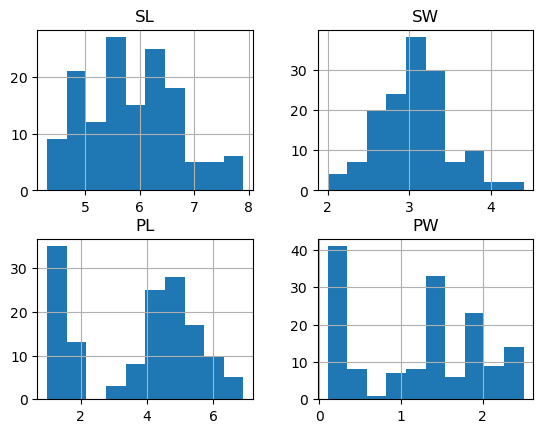

In [9]:
iris.hist();

In [10]:
print(iris['SL'].skew())
print(iris['SW'].skew())
print(iris['PL'].skew())
print(iris['PW'].skew())

0.3068227108046868
0.37781843718771746
-0.2689053923783847
-0.10499656214412734


Not highly skewed, but skewed to the right a bit more, so using median to fill the NaN values.

In [11]:
for i in iris[['SL', 'SW', 'PL', 'PW']]:
    iris[i] = iris[i].fillna(iris[i].median())

In [12]:
iris.isnull().sum().sum()

0

## Performing Feature scaling

In [13]:
iris.head(3)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa


In [14]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [15]:
to_scale = iris.drop('Classification', axis = 1)
to_scale.head(3)

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2


In [16]:
from sklearn.preprocessing import StandardScaler
to_scale = StandardScaler().fit_transform(to_scale)

In [17]:
to_scale = pd.DataFrame(to_scale)
to_scale.head(3)

,0,1,2,3
0,-0.934811,1.076275,-1.380791,-1.312977
1,-1.182990,-0.112541,-1.380791,-1.312977
2,-0.066181,0.362985,-1.438808,-1.312977


In [18]:
iris = iris.drop(['SL', 'SW', 'PL', 'PW'], axis = 1)

In [19]:
iris = pd.concat((to_scale, iris), axis = 1)

In [20]:
iris.columns = ['SL', 'SW', 'PL', 'PW', 'Classification']

In [21]:
iris.head(4)

,SL,SW,PL,PW,Classification
0,-0.934811,1.076275,-1.380791,-1.312977,Iris-setosa
1,-1.182990,-0.112541,-1.380791,-1.312977,Iris-setosa
2,-0.066181,0.362985,-1.438808,-1.312977,Iris-setosa
3,-1.555260,0.125222,-1.322775,-1.312977,Iris-setosa


## Performing label ecnoding

In [22]:
from sklearn.preprocessing import LabelEncoder 
iris['Classification'] = LabelEncoder().fit_transform(iris['Classification'])

In [23]:
iris.head(3)

,SL,SW,PL,PW,Classification
0,-0.934811,1.076275,-1.380791,-1.312977,0
1,-1.182990,-0.112541,-1.380791,-1.312977,0
2,-0.066181,0.362985,-1.438808,-1.312977,0


## Performing Logistic Regression

Creating train and test data

In [24]:
inde = iris.drop('Classification', axis = 1)
dep = iris['Classification']

In [25]:
inde.head(2) 

,SL,SW,PL,PW
0,-0.934811,1.076275,-1.380791,-1.312977
1,-1.182990,-0.112541,-1.380791,-1.312977


In [26]:
dep.head(3)

0    0
1    0
2    0
Name: Classification, dtype: int32

#### Splitting dataframe intotraining and testing data.

In [27]:
from sklearn.model_selection import train_test_split
inde_test, inde_train, dep_test, dep_train = train_test_split(inde, dep, test_size=0.25, random_state=46)

In [28]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', max_iter=120).fit(inde_train, dep_train)

In [29]:
logi_pred = logi_model.predict(inde_test)
logi_pred

array([2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1,
       2, 1, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2,
       0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2,
       0, 1])

In [30]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
cm = confusion_matrix(dep_test, logi_pred)

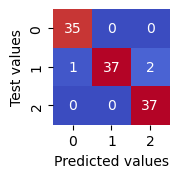

In [32]:
plt.figure(figsize=(1.5,1.5))
sns.heatmap(cm, annot = True, cmap = 'coolwarm', cbar= None)
plt.xlabel('Predicted values')
plt.ylabel('Test values')
plt.show()

In [33]:
print(metrics.classification_report(dep_test, logi_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.93      0.96        40
           2       0.95      1.00      0.97        37

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



## Performing k-NN

In [34]:
from sklearn import *
from sklearn.neighbors import KNeighborsClassifier

#### Performing parameter tuning. 

In [35]:
acc_metric = []
neighbours = np.arange(3,15)

In [36]:
for i in neighbours:
    classifier = KNeighborsClassifier(n_neighbors = i, metric='euclidean')
    classifier.fit(inde_train, dep_train)
    knn_pred = classifier.predict(inde_test)
    knn_acc = accuracy_score(dep_test, knn_pred)
    acc_metric.append(knn_acc)

In [37]:
print(acc_metric)

[0.9107142857142857, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9464285714285714, 0.9285714285714286, 0.9375, 0.9017857142857143, 0.9107142857142857, 0.875, 0.9107142857142857, 0.8482142857142857]


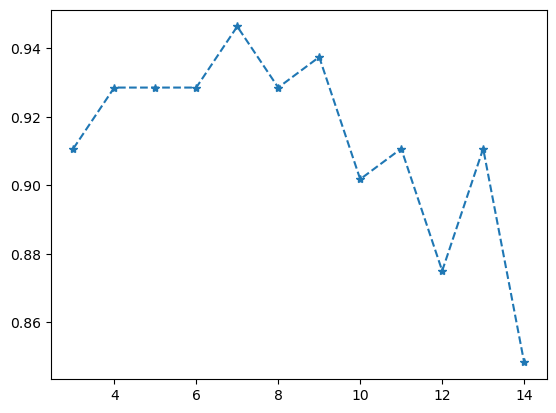

In [49]:
plt.plot(neighbours, acc_metric, '*--')

#### A neighbour number of 7 neighbors gives the maximum accuracy.

In [55]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric='euclidean')
classifier.fit(inde_train, dep_train)
knn_pred = classifier.predict(inde_test)

In [56]:
cm_kNN = confusion_matrix(dep_test,knn_pred)

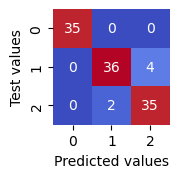

In [57]:
plt.figure(figsize=(1.5,1.5))
sns.heatmap(cm_kNN, annot = True, cmap = 'coolwarm', cbar= None)
plt.xlabel('Predicted values')
plt.ylabel('Test values')
plt.show()

In [59]:
print(metrics.classification_report(dep_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      0.90      0.92        40
           2       0.90      0.95      0.92        37

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



---

#### Comparing both models together.

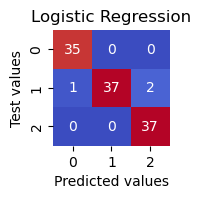

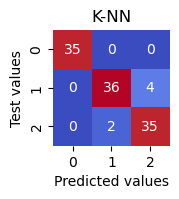

In [65]:
plt.figure(figsize=(1.5,1.5))
sns.heatmap(cm, annot = True, cmap = 'coolwarm', cbar= None)
plt.xlabel('Predicted values')
plt.ylabel('Test values')
plt.title('Logistic Regression')

plt.figure(figsize=(1.5,1.5))
sns.heatmap(cm_kNN, annot = True, cmap = 'coolwarm', cbar= None)
plt.xlabel('Predicted values')
plt.ylabel('Test values')
plt.title('K-NN')
plt.show()

In [68]:
print(metrics.classification_report(dep_test, logi_pred))
print(metrics.classification_report(dep_test, knn_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.93      0.96        40
           2       0.95      1.00      0.97        37

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      0.90      0.92        40
           2       0.90      0.95      0.92        37

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



---

From the above results, from both the confusion matrices and the classification report, 'the Logistic regression gives the best result'.The f1 score is better for the logistic regression. I separately tried removing the outliers (got 6 in the Sepal width) and creating a model, but I got lower accuracy score. 

---